In [401]:
import re
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, LocallyConnected2D, Flatten, Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
from keras.initializers import *
from keras.optimizers import *
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.model_selection import StratifiedKFold
import seaborn as sb
from sklearn.metrics import confusion_matrix

In [402]:
scaler = pre.MinMaxScaler(feature_range=(0,1))
#sb.set(rc={'figure.figsize':(10,10)})

In [403]:
header=['id', 'ccf', 'age', 'sex', 'painLocation', 'painExcertion', 'painResting', 'pncaden', 'chestPainType',
        'restingBP','hyperTension', 'cholestrol', 'smoker', 'noOfCigarette' , 'smokingYears', 'bloodSugar',
        'historyOfDiabetes', 'historyOfHA', 'restingECG', 'ekgmo', 'ekgday', 'ekgyr', 'dig',
        'prop', 'nitr', 'pro' ,'diuretic', 'proto', 'stressTestDuration', 'stressTestSTTime', 'stressTestMet',
        'stressTestMaxHR', 'stressTestRestingHR', 'stressTestMaxFirstBPS','stressTestMaxSecondBPS', 'dummy',
        'stressTestRestingBP', 'exerciseAngina', 'xhypo', 'STDepressionExercise', 'STDepressionSlope',
        'rldv5','rldv5e', 'coloredVesselsFluroscopy', 'restckm','exerckm','restef', 'restwm', 'exeref', 'exerwm',
        'heartWallDamage', 'thalsev', 'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'output', 'lmt',
 'ladprox', 'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4',
 'lvf', 'cathef', 'junk', 'name']

In [404]:
columnsToDrop=['id', 'ccf', 'painExcertion', 'painResting', 'pncaden','historyOfDiabetes', 'ekgmo', 'ekgday',
               'ekgyr', 'dig', 'prop', 'nitr', 'pro' ,'diuretic', 'proto','stressTestMet', 'dummy', 'xhypo',
               'rldv5','rldv5e','restckm','exerckm','restef', 'restwm', 'exeref','exerwm', 'thalsev', 'thalpul',
               'earlobe', 'cmo', 'cday', 'cyr', 'lmt', 'ladprox', 'laddist', 'diag','cxmain', 'ramus', 'om1', 'om2',
               'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4','lvf', 'cathef', 'junk', 'name']

### Reformatting and Preprocessing the four datasets

In [405]:
with open('cleveland.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [406]:
with open('processedCleveland.txt', 'w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [407]:
clevelandData=pd.read_csv("processedCleveland.txt", delimiter=" ", error_bad_lines=False, names=header)
clevelandData=clevelandData.dropna()

In [408]:
with open('hungarian.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [409]:
with open('processedHungarian.txt','w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [410]:
hungarianData=pd.read_csv("processedHungarian.txt", delimiter=" ", error_bad_lines=False, names=header)
hungarianData=hungarianData.dropna()

In [411]:
with open('switzerland.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [412]:
with open('processedSwitzerland.txt','w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [413]:
switzerlandData=pd.read_csv("processedSwitzerland.txt", delimiter=" ", error_bad_lines=False, names=header)
switzerlandData=switzerlandData.dropna()

In [414]:
with open('long-beach-va.data.txt', 'r', errors='replace', encoding='utf-8') as fp:
    line=fp.readlines()

In [415]:
with open('processedLongBeach.txt','w', encoding='utf-8')as fp:
    s=""
    for l in line:
        s=s+l.strip()+" "
        if(l.split()[-1]=="name"):
            fp.write(s.strip()+"\n")
            s=""

In [416]:
longBeachData=pd.read_csv("processedLongBeach.txt", delimiter=" ", error_bad_lines=False, names=header)
longBeachData=longBeachData.dropna()

### Combining all the datasets

In [417]:
frames=[clevelandData,hungarianData,longBeachData,switzerlandData]
data=pd.concat(frames)

In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 122
Data columns (total 76 columns):
id                          900 non-null object
ccf                         900 non-null object
age                         900 non-null object
sex                         900 non-null float64
painLocation                900 non-null float64
painExcertion               900 non-null float64
painResting                 900 non-null float64
pncaden                     900 non-null float64
chestPainType               900 non-null object
restingBP                   900 non-null object
hyperTension                900 non-null object
cholestrol                  900 non-null float64
smoker                      900 non-null object
noOfCigarette               900 non-null float64
smokingYears                900 non-null float64
bloodSugar                  900 non-null float64
historyOfDiabetes           900 non-null float64
historyOfHA                 900 non-null float64
restingECG          

In [419]:
data.head()

,id,ccf,age,sex,painLocation,painExcertion,painResting,pncaden,chestPainType,restingBP,hyperTension,cholestrol,smoker,noOfCigarette,smokingYears,bloodSugar,historyOfDiabetes,historyOfHA,restingECG,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,stressTestDuration,stressTestSTTime,stressTestMet,stressTestMaxHR,stressTestRestingHR,stressTestMaxFirstBPS,stressTestMaxSecondBPS,dummy,stressTestRestingBP,exerciseAngina,xhypo,STDepressionExercise,STDepressionSlope,rldv5,rldv5e,coloredVesselsFluroscopy,restckm,exerckm,restef,restwm,exeref,exerwm,heartWallDamage,thalsev,thalpul,earlobe,cmo,cday,cyr,output,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,1,0,63,1.0,-9.0,-9.0,-9.0,-9.0,1,145,1,233.0,-9,50.0,20.0,1.0,-9.0,1.0,2.0,2.0,3.0,81,0.0,0.0,0,0,0.0,1.0,10.5,6.0,13.0,150.0,60.0,190.0,90.0,145.0,85.0,0.0,0,2.3,3.0,-9,172.0,0,-9,-9.0,-9.0,-9.0,-9.0,-9.0,6.0,-9.0,-9.0,-9,2.0,16.0,81.0,0.0,1.0,1.0,1.0,-9.0,1.0,-9.0,1.0,-9.0,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name
1,2,0,67,1.0,-9.0,-9.0,-9.0,-9.0,4,160,1,286.0,-9,40.0,40.0,0.0,-9.0,1.0,2.0,3.0,5.0,81,0.0,1.0,0,0,0.0,1.0,9.5,6.0,13.0,108.0,64.0,160.0,90.0,160.0,90.0,1.0,0,1.5,2.0,-9,185.0,3,-9,-9.0,-9.0,-9.0,-9.0,-9.0,3.0,-9.0,-9.0,-9,2.0,5.0,81.0,2.0,1.0,2.0,2.0,-9.0,2.0,-9.0,1.0,-9.0,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name
2,3,0,67,1.0,-9.0,-9.0,-9.0,-9.0,4,120,1,229.0,-9,20.0,35.0,0.0,-9.0,1.0,2.0,2.0,19.0,81,0.0,1.0,0,0,0.0,1.0,8.5,6.0,10.0,129.0,78.0,140.0,80.0,120.0,80.0,1.0,0,2.6,2.0,-9,150.0,2,-9,-9.0,-9.0,-9.0,-9.0,-9.0,7.0,-9.0,-9.0,-9,2.0,20.0,81.0,1.0,1.0,1.0,1.0,-9.0,1.0,-9.0,1.0,-9.0,2.0,2.0,1.0,1,1.0,7,3,-9,-9.0,name
3,4,0,37,1.0,-9.0,-9.0,-9.0,-9.0,3,130,0,250.0,-9,0.0,0.0,0.0,-9.0,1.0,0.0,2.0,13.0,81,0.0,1.0,0,0,0.0,1.0,13.0,13.0,17.0,187.0,84.0,195.0,68.0,130.0,78.0,0.0,0,3.5,3.0,-9,167.0,0,-9,-9.0,-9.0,-9.0,-9.0,-9.0,3.0,-9.0,-9.0,-9,2.0,4.0,81.0,0.0,1.0,1.0,1.0,-9.0,1.0,-9.0,1.0,-9.0,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name
4,6,0,41,0.0,-9.0,-9.0,-9.0,-9.0,2,130,1,204.0,-9,0.0,0.0,0.0,-9.0,1.0,2.0,2.0,7.0,81,0.0,0.0,0,0,0.0,1.0,7.0,-9.0,9.0,172.0,71.0,160.0,74.0,130.0,86.0,0.0,0,1.4,1.0,-9,40.0,0,-9,-9.0,-9.0,-9.0,-9.0,-9.0,3.0,-9.0,-9.0,-9,2.0,18.0,81.0,0.0,1.0,1.0,1.0,-9.0,1.0,-9.0,1.0,-9.0,1.0,1.0,1.0,1,1.0,1,1,-9,-9.0,name


In [420]:
data=data.drop(columnsToDrop,axis=1)

In [421]:
data.head()

,age,sex,painLocation,chestPainType,restingBP,hyperTension,cholestrol,smoker,noOfCigarette,smokingYears,bloodSugar,historyOfHA,restingECG,stressTestDuration,stressTestSTTime,stressTestMaxHR,stressTestRestingHR,stressTestMaxFirstBPS,stressTestMaxSecondBPS,stressTestRestingBP,exerciseAngina,STDepressionExercise,STDepressionSlope,coloredVesselsFluroscopy,heartWallDamage,output
0,63,1.0,-9.0,1,145,1,233.0,-9,50.0,20.0,1.0,1.0,2.0,10.5,6.0,150.0,60.0,190.0,90.0,85.0,0.0,2.3,3.0,0,6.0,0.0
1,67,1.0,-9.0,4,160,1,286.0,-9,40.0,40.0,0.0,1.0,2.0,9.5,6.0,108.0,64.0,160.0,90.0,90.0,1.0,1.5,2.0,3,3.0,2.0
2,67,1.0,-9.0,4,120,1,229.0,-9,20.0,35.0,0.0,1.0,2.0,8.5,6.0,129.0,78.0,140.0,80.0,80.0,1.0,2.6,2.0,2,7.0,1.0
3,37,1.0,-9.0,3,130,0,250.0,-9,0.0,0.0,0.0,1.0,0.0,13.0,13.0,187.0,84.0,195.0,68.0,78.0,0.0,3.5,3.0,0,3.0,0.0
4,41,0.0,-9.0,2,130,1,204.0,-9,0.0,0.0,0.0,1.0,2.0,7.0,-9.0,172.0,71.0,160.0,74.0,86.0,0.0,1.4,1.0,0,3.0,0.0


In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 122
Data columns (total 26 columns):
age                         900 non-null object
sex                         900 non-null float64
painLocation                900 non-null float64
chestPainType               900 non-null object
restingBP                   900 non-null object
hyperTension                900 non-null object
cholestrol                  900 non-null float64
smoker                      900 non-null object
noOfCigarette               900 non-null float64
smokingYears                900 non-null float64
bloodSugar                  900 non-null float64
historyOfHA                 900 non-null float64
restingECG                  900 non-null float64
stressTestDuration          900 non-null float64
stressTestSTTime            900 non-null float64
stressTestMaxHR             900 non-null float64
stressTestRestingHR         900 non-null float64
stressTestMaxFirstBPS       900 non-null float64
stressTestMaxSecon

### Processing of the data

In [423]:
def processPainLocation(columns):
    if(columns[0]==-9):
        if(columns[1]>0):
            if(columns[2]==1):
                return 0
            return 1
        return 0
    return columns[0]

In [424]:
def replaceByMean(columns,mean):
    if(columns[0]<1):
        return int(mean)
    return columns[0]

In [425]:
def processHypertension(columns):
    if(columns[0]==-9):
        if(columns[1]>120):
            return 1
        return 0
    return columns[0]

In [426]:
def processCholestrol(columns):
    if(columns[0]<=200):
        return 0
    elif(columns[0]<=239):
        return 1
    else:
        return 2

In [427]:
def processSmoking(columns):
    if(columns[0]==-9):
        if(int(columns[1])>0):
            return 1
        elif(int(columns[1])==0):
            return 0
        if(int(columns[2])>0):
            return 1
        elif(int(columns[2])==0):
            return 0
    return int(columns[0])

In [428]:
def addDummyCategory(columns):
    if(columns[0]==-9):
        return -1
    return columns[0]

In [429]:
def processRestingECG(columns):
    if(columns[0]==2):
        return 1
    return columns[0]

In [430]:
def processstressTestSTTime(columns):
    if(columns[0]==-9):
        return -1
    return columns[0]

In [431]:
def processExerciseAgnia(columns):
    if(columns[0]==-9):
        if(columns[1]==1):
            return 1
        return 0
    return columns[0]

In [432]:
def processSTDepressionSlope(columns):
    if(columns[0]<1):
        return -1
    if(columns[0]==1):
        return 1
    if(columns[0]==2):
        return 0
    if(columns[0]==3):
        return 2
    return columns[0]

In [433]:
def processcoloredVesselsFluroscopy(columns):
    if(columns[0]==-9 or columns[0]==9):
        return -1
    return columns[0]

In [434]:
def processHeartWallDamage(columns):
    if(columns[0]==-9):
        return -1
    if(columns[0]<=3):
        return 0
    if(columns[0]<=6):
        return 2
    if(columns[0]==7):
        return 1

In [435]:
def processOutput(columns):
    if(columns[0]>1):
        return 1
    return 0

In [436]:
data = data.sample(frac=1).reset_index(drop=True)

In [437]:
data['age']=pd.to_numeric(data['age'])
d=data[data.age !=-9]
d=d[d.age != 0]
mean=d['age'].mean()
mean=data['age'].mean()
data['age']=data[['age']].apply(replaceByMean,args=(mean,),axis=1)

In [438]:
data['sex']=pd.to_numeric(data['sex'])

In [439]:
data['painLocation']=data[['painLocation','output','bloodSugar']].apply(processPainLocation,axis=1)

In [440]:
data['chestPainType']=pd.to_numeric(data['chestPainType'])

In [441]:
dummyList = pd.get_dummies(data['chestPainType'], prefix='chestPainType')
data=data.drop('chestPainType',axis=1)
data=data.join(dummyList)

In [442]:
data['restingBP']=pd.to_numeric(data['restingBP'])
d=data[data.restingBP !=-9]
d=d[d.restingBP != 0]
mean=d['restingBP'].mean()
data['restingBP']=data[['restingBP']].apply(replaceByMean,args=(mean,),axis=1)

In [443]:
data['hyperTension']=pd.to_numeric(data['hyperTension'])
data['hyperTension']=data[['hyperTension','restingBP']].apply(processHypertension,axis=1)

In [444]:
data['cholestrol']=pd.to_numeric(data['cholestrol'])
d=data[data.cholestrol !=-9]
d=d[d.cholestrol != 0]
mean=d['cholestrol'].mean()
data['cholestrol']=data[['cholestrol']].apply(replaceByMean,args=(mean,),axis=1)

In [445]:
data['cholestrol']=data[['cholestrol']].apply(processCholestrol,axis=1)

In [446]:
dummyList = pd.get_dummies(data['cholestrol'], prefix='cholestrol')
data=data.join(dummyList)
data=data.drop('cholestrol',axis=1)

In [447]:
data['smoker']=pd.to_numeric(data['smoker'])
data['smoker']=data[['smoker','smokingYears','noOfCigarette']].apply(processSmoking,axis=1)

In [448]:
data['smoker']=data[['smoker']].apply(addDummyCategory,axis=1)

In [449]:
dummyList = pd.get_dummies(data['smoker'], prefix='smoker')
data=data.join(dummyList)
data=data.drop('smoker',axis=1)

In [450]:
data['bloodSugar']=pd.to_numeric(data['bloodSugar'])
data['bloodSugar']=data[['bloodSugar']].apply(addDummyCategory,axis=1)

In [451]:
data.at[data[data.bloodSugar==40].index[0],'bloodSugar']=int(-1)

In [452]:
dummyList = pd.get_dummies(data['bloodSugar'], prefix='bloodSugar')
data=data.join(dummyList)
data=data.drop('bloodSugar',axis=1)

In [453]:
data['historyOfHA']=pd.to_numeric(data['historyOfHA'])
data['historyOfHA']=data[['historyOfHA']].apply(addDummyCategory,axis=1)

In [454]:
dummyList = pd.get_dummies(data['historyOfHA'], prefix='historyOfHA')
data=data.join(dummyList)
data=data.drop('historyOfHA',axis=1)

In [455]:
data['restingECG']=pd.to_numeric(data['restingECG'])

In [456]:
data.at[data[data.restingECG==-9].index[0],'restingECG']=int(0)
data.at[data[data.restingECG==-9].index[0],'restingECG']=int(0)
data.at[data[data.restingECG==0.4].index[0],'restingECG']=int(0)

In [457]:
dummyList = pd.get_dummies(data['restingECG'], prefix='restingECG')
data=data.join(dummyList)
data=data.drop('restingECG',axis=1)

In [458]:
#data['restingECG']=data[['restingECG']].apply(processRestingECG,axis=1)

In [459]:
data['stressTestDuration']=pd.to_numeric(data['stressTestDuration'])
data['stressTestDuration']=data[['stressTestDuration']].apply(replaceByMean,args=(mean,),axis=1)

In [460]:
data['stressTestSTTime']=pd.to_numeric(data['stressTestSTTime'])
data['stressTestSTTime']=data[['stressTestSTTime']].apply(addDummyCategory,axis=1)

In [461]:
data['stressTestMaxHR']=pd.to_numeric(data['stressTestMaxHR'])
d=data[data.stressTestMaxHR !=-9]
mean=d['stressTestMaxHR'].mean()
data['stressTestMaxHR']=data[['stressTestMaxHR']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestMaxHR==8105].index[0],'stressTestMaxHR']=int(mean)

In [462]:
data['stressTestRestingHR']=pd.to_numeric(data['stressTestRestingHR'])
d=data[data.stressTestRestingHR !=-9]
mean=d['stressTestRestingHR'].mean()
data['stressTestRestingHR']=data[['stressTestRestingHR']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestRestingHR==1.0].index[0],'stressTestRestingHR']=int(mean)
data.at[data[data.stressTestRestingHR==37.0].index[0],'stressTestRestingHR']=int(mean)
data.at[data[data.stressTestRestingHR==39.0].index[0],'stressTestRestingHR']=int(mean)

In [463]:
data['stressTestMaxFirstBPS']=pd.to_numeric(data['stressTestMaxFirstBPS'])
d=data[data.stressTestMaxFirstBPS !=-9]
mean=d['stressTestMaxFirstBPS'].mean()
data['stressTestMaxFirstBPS']=data[['stressTestMaxFirstBPS']].apply(replaceByMean,args=(mean,),axis=1)

In [464]:
data['stressTestMaxSecondBPS']=pd.to_numeric(data['stressTestMaxSecondBPS'])
d=data[data.stressTestMaxSecondBPS !=-9]
mean=d['stressTestMaxSecondBPS'].mean()
data['stressTestMaxSecondBPS']=data[['stressTestMaxSecondBPS']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestMaxSecondBPS==1.0].index[0],'stressTestMaxSecondBPS']=int(mean)
data.at[data[data.stressTestMaxSecondBPS==11.0].index[0],'stressTestMaxSecondBPS']=int(mean)
data.at[data[data.stressTestMaxSecondBPS==26.0].index[0],'stressTestMaxSecondBPS']=int(mean)

In [465]:
data['stressTestRestingBP']=pd.to_numeric(data['stressTestRestingBP'])
d=data[data.stressTestRestingBP !=-9]
mean=d['stressTestRestingBP'].mean()
data['stressTestRestingBP']=data[['stressTestRestingBP']].apply(replaceByMean,args=(mean,),axis=1)
data.at[data[data.stressTestRestingBP==1018].index[0],'stressTestRestingBP']=int(mean)

In [466]:
data['exerciseAngina']=pd.to_numeric(data['exerciseAngina'])
data['exerciseAngina']=data[['exerciseAngina','painLocation']].apply(processExerciseAgnia,axis=1)
data.at[data[data.exerciseAngina==101881].index[0],'exerciseAngina']=int(1)

In [467]:
data['STDepressionExercise']=pd.to_numeric(data['STDepressionExercise'])
d=data[data.STDepressionExercise !=-9]
mean=d['STDepressionExercise'].mean()
data['STDepressionExercise']=data[['STDepressionExercise']].apply(replaceByMean,args=(mean,),axis=1)

In [468]:
data['STDepressionSlope']=pd.to_numeric(data['STDepressionSlope'])
data['STDepressionSlope']=data[['STDepressionSlope']].apply(processSTDepressionSlope,axis=1)

In [469]:
dummyList = pd.get_dummies(data['STDepressionSlope'], prefix='STDepressionSlope')
data=data.join(dummyList)
data=data.drop('STDepressionSlope',axis=1)

In [470]:
data['coloredVesselsFluroscopy']=pd.to_numeric(data['coloredVesselsFluroscopy'])
data['coloredVesselsFluroscopy']=data[['coloredVesselsFluroscopy']].apply(processcoloredVesselsFluroscopy,axis=1)

In [471]:
dummyList = pd.get_dummies(data['coloredVesselsFluroscopy'], prefix='coloredVesselsFluroscopy')
data=data.join(dummyList)
data=data.drop('coloredVesselsFluroscopy',axis=1)

In [472]:
data['heartWallDamage']=pd.to_numeric(data['heartWallDamage'])
data['heartWallDamage']=data[['heartWallDamage']].apply(processHeartWallDamage,axis=1)

In [473]:
dummyList = pd.get_dummies(data['heartWallDamage'], prefix='heartWallDamage')
data=data.join(dummyList)
data=data.drop('heartWallDamage',axis=1)

In [474]:
data['output']=pd.to_numeric(data['output'])
data['output']=data[['output']].apply(processOutput,axis=1)

In [475]:
dataOutput=pd.DataFrame(data['output'])

In [476]:
dataOutput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 1 columns):
output    900 non-null int64
dtypes: int64(1)
memory usage: 7.1 KB


In [477]:
data=data.drop(['noOfCigarette' , 'smokingYears'],axis=1)

In [478]:
data=data.drop(['output'],axis=1)

In [479]:
pd.set_option('display.max_columns', None)
data.head()

,age,sex,painLocation,restingBP,hyperTension,stressTestDuration,stressTestSTTime,stressTestMaxHR,stressTestRestingHR,stressTestMaxFirstBPS,stressTestMaxSecondBPS,stressTestRestingBP,exerciseAngina,STDepressionExercise,chestPainType_1,chestPainType_2,chestPainType_3,chestPainType_4,cholestrol_0,cholestrol_1,cholestrol_2,smoker_-1,smoker_0,smoker_1,bloodSugar_-1.0,bloodSugar_0.0,bloodSugar_1.0,historyOfHA_-1.0,historyOfHA_0.0,historyOfHA_1.0,restingECG_0.0,restingECG_1.0,restingECG_2.0,STDepressionSlope_-1,STDepressionSlope_0,STDepressionSlope_1,STDepressionSlope_2,coloredVesselsFluroscopy_-1,coloredVesselsFluroscopy_0,coloredVesselsFluroscopy_1,coloredVesselsFluroscopy_2,coloredVesselsFluroscopy_3,heartWallDamage_-1,heartWallDamage_0,heartWallDamage_1,heartWallDamage_2
0,55,1.0,1.0,140,1,8.0,-1.0,150.0,105.0,200.0,95.0,90.0,0.0,0.0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,63,1.0,1.0,110,1,2.0,-1.0,140.0,94.0,130.0,80.0,80.0,1.0,2.0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,41,1.0,1.0,120,0,20.0,-1.0,170.0,64.0,210.0,85.0,80.0,0.0,0.0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,54,0.0,1.0,120,1,6.0,-1.0,140.0,74.0,140.0,80.0,80.0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,76,1.0,1.0,104,1,8.0,-1.0,120.0,70.0,160.0,76.0,58.0,0.0,3.5,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0


In [480]:
#data=data.drop(['smoker_-1','bloodSugar_-1.0','historyOfHA_-1.0','STDepressionSlope_-1',
#               'coloredVesselsFluroscopy_-1','heartWallDamage_-1'],axis=1)

In [481]:
pd.set_option('display.max_columns', None)
data.head()

,age,sex,painLocation,restingBP,hyperTension,stressTestDuration,stressTestSTTime,stressTestMaxHR,stressTestRestingHR,stressTestMaxFirstBPS,stressTestMaxSecondBPS,stressTestRestingBP,exerciseAngina,STDepressionExercise,chestPainType_1,chestPainType_2,chestPainType_3,chestPainType_4,cholestrol_0,cholestrol_1,cholestrol_2,smoker_-1,smoker_0,smoker_1,bloodSugar_-1.0,bloodSugar_0.0,bloodSugar_1.0,historyOfHA_-1.0,historyOfHA_0.0,historyOfHA_1.0,restingECG_0.0,restingECG_1.0,restingECG_2.0,STDepressionSlope_-1,STDepressionSlope_0,STDepressionSlope_1,STDepressionSlope_2,coloredVesselsFluroscopy_-1,coloredVesselsFluroscopy_0,coloredVesselsFluroscopy_1,coloredVesselsFluroscopy_2,coloredVesselsFluroscopy_3,heartWallDamage_-1,heartWallDamage_0,heartWallDamage_1,heartWallDamage_2
0,55,1.0,1.0,140,1,8.0,-1.0,150.0,105.0,200.0,95.0,90.0,0.0,0.0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,63,1.0,1.0,110,1,2.0,-1.0,140.0,94.0,130.0,80.0,80.0,1.0,2.0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,41,1.0,1.0,120,0,20.0,-1.0,170.0,64.0,210.0,85.0,80.0,0.0,0.0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,54,0.0,1.0,120,1,6.0,-1.0,140.0,74.0,140.0,80.0,80.0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,76,1.0,1.0,104,1,8.0,-1.0,120.0,70.0,160.0,76.0,58.0,0.0,3.5,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0


In [482]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 46 columns):
age                            900 non-null int64
sex                            900 non-null float64
painLocation                   900 non-null float64
restingBP                      900 non-null int64
hyperTension                   900 non-null int64
stressTestDuration             900 non-null float64
stressTestSTTime               900 non-null float64
stressTestMaxHR                900 non-null float64
stressTestRestingHR            900 non-null float64
stressTestMaxFirstBPS          900 non-null float64
stressTestMaxSecondBPS         900 non-null float64
stressTestRestingBP            900 non-null float64
exerciseAngina                 900 non-null float64
STDepressionExercise           900 non-null float64
chestPainType_1                900 non-null uint8
chestPainType_2                900 non-null uint8
chestPainType_3                900 non-null uint8
chestPainType_4        

### Training of the model

In [483]:
trainingData_X, testingData_X, trainingData_Y, testingData_Y = train_test_split(data,
                                                                                dataOutput,
                                                                                test_size = 0.2,
                                                                                random_state=5)

In [484]:
x_train=trainingData_X.values

sacler=scaler.fit(x_train)
x_train=scaler.transform(x_train)

In [485]:
x_test=testingData_X.values

sacler=scaler.fit(x_test)
x_test=scaler.transform(x_test)

In [486]:
y_train=trainingData_Y.values
y_test=testingData_Y.values

In [487]:
x_train=x_train.astype('float32')
y_train=y_train.astype('float32')
x_test=x_test.astype('float32')
y_test=y_test.astype('float32')

In [488]:
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

In [489]:
firstLayer=x_train.shape[1]
secondLayer=int(x_train.shape[1]/4)
thirdLayer=y_train.shape[1]

In [490]:
print(firstLayer," ",secondLayer," ",thirdLayer)

46   11   1


In [491]:
model=Sequential()
model.add(Dense(firstLayer, input_dim=x_train.shape[1], activation='relu',
                kernel_initializer=he_normal(seed=None),
                bias_initializer=Constant(value=0)))
model.add(Dropout(0.2))
model.add(Dense(secondLayer,activation='relu',
                kernel_initializer=he_normal(seed=None),
                bias_initializer=Constant(value=0),
               kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.2))
model.add(Dense(thirdLayer, activation='sigmoid',kernel_initializer=he_normal(seed=None),
                bias_initializer=Constant(value=0)))

In [492]:
model.compile(loss='mse', optimizer=SGD(lr=0.005, momentum=0.0, decay=0.0, nesterov=False),metrics=['accuracy'])

In [493]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 46)                2162      
_________________________________________________________________
dropout_9 (Dropout)          (None, 46)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 11)                517       
_________________________________________________________________
dropout_10 (Dropout)         (None, 11)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 12        
Total params: 2,691
Trainable params: 2,691
Non-trainable params: 0
_________________________________________________________________


In [494]:
history=model.fit(x_train, y_train, validation_split=0.1, epochs=1000,batch_size=16)

Train on 648 samples, validate on 72 samples
Epoch 1/1000
648/648 [==============================] - 0s 314us/step - loss: 1.0300 - acc: 0.4722 - val_loss: 1.0256 - val_acc: 0.4167
Epoch 2/1000
648/648 [==============================] - 0s 91us/step - loss: 1.0128 - acc: 0.5324 - val_loss: 1.0130 - val_acc: 0.5000
Epoch 3/1000
648/648 [==============================] - 0s 105us/step - loss: 1.0035 - acc: 0.5309 - val_loss: 1.0011 - val_acc: 0.5417
Epoch 4/1000
648/648 [==============================] - 0s 71us/step - loss: 0.9899 - acc: 0.5540 - val_loss: 0.9895 - val_acc: 0.5556
Epoch 5/1000
648/648 [==============================] - 0s 68us/step - loss: 0.9730 - acc: 0.5802 - val_loss: 0.9783 - val_acc: 0.5556
Epoch 6/1000
648/648 [==============================] - 0s 61us/step - loss: 0.9653 - acc: 0.5741 - val_loss: 0.9671 - val_acc: 0.5417
Epoch 7/1000
648/648 [==============================] - 0s 74us/step - loss: 0.9505 - acc: 0.6049 - val_loss: 0.9560 - val_acc: 0.5694
Epoch 8/

Epoch 61/1000
648/648 [==============================] - 0s 59us/step - loss: 0.5125 - acc: 0.6543 - val_loss: 0.5191 - val_acc: 0.5833
Epoch 62/1000
648/648 [==============================] - 0s 59us/step - loss: 0.5070 - acc: 0.6559 - val_loss: 0.5130 - val_acc: 0.5833
Epoch 63/1000
648/648 [==============================] - 0s 58us/step - loss: 0.5011 - acc: 0.6651 - val_loss: 0.5072 - val_acc: 0.5833
Epoch 64/1000
648/648 [==============================] - 0s 59us/step - loss: 0.4962 - acc: 0.6636 - val_loss: 0.5014 - val_acc: 0.5833
Epoch 65/1000
648/648 [==============================] - 0s 59us/step - loss: 0.4909 - acc: 0.6605 - val_loss: 0.4958 - val_acc: 0.5833
Epoch 66/1000
648/648 [==============================] - 0s 58us/step - loss: 0.4846 - acc: 0.6512 - val_loss: 0.4903 - val_acc: 0.5833
Epoch 67/1000
648/648 [==============================] - 0s 60us/step - loss: 0.4797 - acc: 0.6559 - val_loss: 0.4848 - val_acc: 0.5833
Epoch 68/1000
648/648 [=========================

Epoch 121/1000
648/648 [==============================] - 0s 72us/step - loss: 0.2797 - acc: 0.6975 - val_loss: 0.2792 - val_acc: 0.6667
Epoch 122/1000
648/648 [==============================] - 0s 59us/step - loss: 0.2779 - acc: 0.6867 - val_loss: 0.2773 - val_acc: 0.6806
Epoch 123/1000
648/648 [==============================] - 0s 59us/step - loss: 0.2764 - acc: 0.6852 - val_loss: 0.2756 - val_acc: 0.6806
Epoch 124/1000
648/648 [==============================] - 0s 60us/step - loss: 0.2719 - acc: 0.6883 - val_loss: 0.2737 - val_acc: 0.6806
Epoch 125/1000
648/648 [==============================] - 0s 63us/step - loss: 0.2699 - acc: 0.6944 - val_loss: 0.2717 - val_acc: 0.6806
Epoch 126/1000
648/648 [==============================] - 0s 63us/step - loss: 0.2707 - acc: 0.7022 - val_loss: 0.2698 - val_acc: 0.6806
Epoch 127/1000
648/648 [==============================] - 0s 59us/step - loss: 0.2675 - acc: 0.6806 - val_loss: 0.2687 - val_acc: 0.6806
Epoch 128/1000
648/648 [=================

648/648 [==============================] - 0s 74us/step - loss: 0.2190 - acc: 0.6929 - val_loss: 0.2168 - val_acc: 0.7361
Epoch 181/1000
648/648 [==============================] - 0s 82us/step - loss: 0.2146 - acc: 0.6929 - val_loss: 0.2163 - val_acc: 0.7361
Epoch 182/1000
648/648 [==============================] - 0s 85us/step - loss: 0.2164 - acc: 0.7068 - val_loss: 0.2158 - val_acc: 0.7500
Epoch 183/1000
648/648 [==============================] - 0s 80us/step - loss: 0.2123 - acc: 0.7068 - val_loss: 0.2155 - val_acc: 0.7639
Epoch 184/1000
648/648 [==============================] - 0s 67us/step - loss: 0.2170 - acc: 0.6991 - val_loss: 0.2153 - val_acc: 0.7639
Epoch 185/1000
648/648 [==============================] - 0s 59us/step - loss: 0.2095 - acc: 0.7160 - val_loss: 0.2151 - val_acc: 0.7361
Epoch 186/1000
648/648 [==============================] - 0s 59us/step - loss: 0.2101 - acc: 0.7099 - val_loss: 0.2143 - val_acc: 0.7222
Epoch 187/1000
648/648 [==============================] 

Epoch 240/1000
648/648 [==============================] - 0s 59us/step - loss: 0.2046 - acc: 0.7099 - val_loss: 0.2040 - val_acc: 0.7361
Epoch 241/1000
648/648 [==============================] - 0s 59us/step - loss: 0.2010 - acc: 0.7068 - val_loss: 0.2035 - val_acc: 0.7083
Epoch 242/1000
648/648 [==============================] - 0s 66us/step - loss: 0.2074 - acc: 0.7083 - val_loss: 0.2033 - val_acc: 0.7083
Epoch 243/1000
648/648 [==============================] - 0s 76us/step - loss: 0.2061 - acc: 0.7099 - val_loss: 0.2032 - val_acc: 0.7083
Epoch 244/1000
648/648 [==============================] - 0s 68us/step - loss: 0.2059 - acc: 0.7068 - val_loss: 0.2030 - val_acc: 0.7083
Epoch 245/1000
648/648 [==============================] - 0s 59us/step - loss: 0.2061 - acc: 0.6852 - val_loss: 0.2036 - val_acc: 0.7361
Epoch 246/1000
648/648 [==============================] - 0s 59us/step - loss: 0.2067 - acc: 0.7068 - val_loss: 0.2032 - val_acc: 0.7222
Epoch 247/1000
648/648 [=================

Epoch 300/1000
648/648 [==============================] - 0s 88us/step - loss: 0.1970 - acc: 0.7253 - val_loss: 0.1979 - val_acc: 0.6944
Epoch 301/1000
648/648 [==============================] - 0s 85us/step - loss: 0.2008 - acc: 0.7114 - val_loss: 0.1979 - val_acc: 0.6944
Epoch 302/1000
648/648 [==============================] - 0s 102us/step - loss: 0.1948 - acc: 0.7269 - val_loss: 0.1975 - val_acc: 0.6944
Epoch 303/1000
648/648 [==============================] - 0s 93us/step - loss: 0.2015 - acc: 0.7284 - val_loss: 0.1976 - val_acc: 0.6944
Epoch 304/1000
648/648 [==============================] - 0s 85us/step - loss: 0.1996 - acc: 0.7269 - val_loss: 0.1980 - val_acc: 0.6944
Epoch 305/1000
648/648 [==============================] - 0s 90us/step - loss: 0.2054 - acc: 0.7037 - val_loss: 0.1983 - val_acc: 0.7083
Epoch 306/1000
648/648 [==============================] - 0s 78us/step - loss: 0.1940 - acc: 0.7269 - val_loss: 0.1982 - val_acc: 0.7083
Epoch 307/1000
648/648 [================

648/648 [==============================] - 0s 102us/step - loss: 0.1923 - acc: 0.7238 - val_loss: 0.1944 - val_acc: 0.6944
Epoch 360/1000
648/648 [==============================] - 0s 79us/step - loss: 0.1962 - acc: 0.7176 - val_loss: 0.1942 - val_acc: 0.6944
Epoch 361/1000
648/648 [==============================] - 0s 81us/step - loss: 0.1940 - acc: 0.7114 - val_loss: 0.1941 - val_acc: 0.6944
Epoch 362/1000
648/648 [==============================] - 0s 83us/step - loss: 0.1979 - acc: 0.7145 - val_loss: 0.1952 - val_acc: 0.6944
Epoch 363/1000
648/648 [==============================] - 0s 89us/step - loss: 0.1979 - acc: 0.7145 - val_loss: 0.1944 - val_acc: 0.6944
Epoch 364/1000
648/648 [==============================] - 0s 81us/step - loss: 0.1936 - acc: 0.7191 - val_loss: 0.1940 - val_acc: 0.6806
Epoch 365/1000
648/648 [==============================] - 0s 83us/step - loss: 0.1913 - acc: 0.7315 - val_loss: 0.1942 - val_acc: 0.6944
Epoch 366/1000
648/648 [==============================]

Epoch 419/1000
648/648 [==============================] - 0s 94us/step - loss: 0.1885 - acc: 0.7346 - val_loss: 0.1920 - val_acc: 0.6667
Epoch 420/1000
648/648 [==============================] - 0s 98us/step - loss: 0.1916 - acc: 0.7207 - val_loss: 0.1918 - val_acc: 0.6667
Epoch 421/1000
648/648 [==============================] - 0s 101us/step - loss: 0.1969 - acc: 0.7022 - val_loss: 0.1927 - val_acc: 0.6667
Epoch 422/1000
648/648 [==============================] - 0s 96us/step - loss: 0.1930 - acc: 0.7284 - val_loss: 0.1921 - val_acc: 0.6667
Epoch 423/1000
648/648 [==============================] - 0s 91us/step - loss: 0.1932 - acc: 0.7222 - val_loss: 0.1918 - val_acc: 0.6667
Epoch 424/1000
648/648 [==============================] - 0s 83us/step - loss: 0.1947 - acc: 0.7191 - val_loss: 0.1920 - val_acc: 0.6667
Epoch 425/1000
648/648 [==============================] - 0s 93us/step - loss: 0.1915 - acc: 0.7222 - val_loss: 0.1915 - val_acc: 0.6667
Epoch 426/1000
648/648 [================

Epoch 479/1000
648/648 [==============================] - 0s 74us/step - loss: 0.1939 - acc: 0.7099 - val_loss: 0.1905 - val_acc: 0.6806
Epoch 480/1000
648/648 [==============================] - 0s 97us/step - loss: 0.1879 - acc: 0.7269 - val_loss: 0.1905 - val_acc: 0.6667
Epoch 481/1000
648/648 [==============================] - 0s 85us/step - loss: 0.1967 - acc: 0.7022 - val_loss: 0.1905 - val_acc: 0.6806
Epoch 482/1000
648/648 [==============================] - 0s 90us/step - loss: 0.1958 - acc: 0.7083 - val_loss: 0.1907 - val_acc: 0.6806
Epoch 483/1000
648/648 [==============================] - 0s 73us/step - loss: 0.1916 - acc: 0.7269 - val_loss: 0.1909 - val_acc: 0.6667
Epoch 484/1000
648/648 [==============================] - 0s 64us/step - loss: 0.1932 - acc: 0.7160 - val_loss: 0.1905 - val_acc: 0.6806
Epoch 485/1000
648/648 [==============================] - 0s 71us/step - loss: 0.1888 - acc: 0.7176 - val_loss: 0.1905 - val_acc: 0.6667
Epoch 486/1000
648/648 [=================

Epoch 539/1000
648/648 [==============================] - 0s 79us/step - loss: 0.1872 - acc: 0.7392 - val_loss: 0.1876 - val_acc: 0.6944
Epoch 540/1000
648/648 [==============================] - 0s 89us/step - loss: 0.1828 - acc: 0.7454 - val_loss: 0.1875 - val_acc: 0.7083
Epoch 541/1000
648/648 [==============================] - 0s 97us/step - loss: 0.1869 - acc: 0.7269 - val_loss: 0.1873 - val_acc: 0.7083
Epoch 542/1000
648/648 [==============================] - 0s 80us/step - loss: 0.1899 - acc: 0.7176 - val_loss: 0.1872 - val_acc: 0.7083
Epoch 543/1000
648/648 [==============================] - 0s 92us/step - loss: 0.1844 - acc: 0.7423 - val_loss: 0.1869 - val_acc: 0.7083
Epoch 544/1000
648/648 [==============================] - 0s 73us/step - loss: 0.1896 - acc: 0.7191 - val_loss: 0.1871 - val_acc: 0.7083
Epoch 545/1000
648/648 [==============================] - 0s 59us/step - loss: 0.1872 - acc: 0.7253 - val_loss: 0.1872 - val_acc: 0.6944
Epoch 546/1000
648/648 [=================

Epoch 599/1000
648/648 [==============================] - 0s 77us/step - loss: 0.1899 - acc: 0.7284 - val_loss: 0.1860 - val_acc: 0.7083
Epoch 600/1000
648/648 [==============================] - 0s 67us/step - loss: 0.1942 - acc: 0.7114 - val_loss: 0.1866 - val_acc: 0.6944
Epoch 601/1000
648/648 [==============================] - 0s 61us/step - loss: 0.1871 - acc: 0.7346 - val_loss: 0.1862 - val_acc: 0.7083
Epoch 602/1000
648/648 [==============================] - 0s 74us/step - loss: 0.1868 - acc: 0.7438 - val_loss: 0.1860 - val_acc: 0.7083
Epoch 603/1000
648/648 [==============================] - 0s 85us/step - loss: 0.1911 - acc: 0.7099 - val_loss: 0.1862 - val_acc: 0.7083
Epoch 604/1000
648/648 [==============================] - 0s 99us/step - loss: 0.1906 - acc: 0.7083 - val_loss: 0.1874 - val_acc: 0.6806
Epoch 605/1000
648/648 [==============================] - 0s 93us/step - loss: 0.1861 - acc: 0.7315 - val_loss: 0.1863 - val_acc: 0.7083
Epoch 606/1000
648/648 [=================

Epoch 659/1000
648/648 [==============================] - 0s 86us/step - loss: 0.1918 - acc: 0.7176 - val_loss: 0.1853 - val_acc: 0.6944
Epoch 660/1000
648/648 [==============================] - 0s 81us/step - loss: 0.1916 - acc: 0.7052 - val_loss: 0.1853 - val_acc: 0.7083
Epoch 661/1000
648/648 [==============================] - 0s 79us/step - loss: 0.1875 - acc: 0.7253 - val_loss: 0.1852 - val_acc: 0.6944
Epoch 662/1000
648/648 [==============================] - 0s 69us/step - loss: 0.1871 - acc: 0.7269 - val_loss: 0.1861 - val_acc: 0.6806
Epoch 663/1000
648/648 [==============================] - 0s 66us/step - loss: 0.1858 - acc: 0.7130 - val_loss: 0.1858 - val_acc: 0.6806
Epoch 664/1000
648/648 [==============================] - 0s 66us/step - loss: 0.1871 - acc: 0.7315 - val_loss: 0.1851 - val_acc: 0.7083
Epoch 665/1000
648/648 [==============================] - 0s 66us/step - loss: 0.1879 - acc: 0.7299 - val_loss: 0.1849 - val_acc: 0.7083
Epoch 666/1000
648/648 [=================

Epoch 719/1000
648/648 [==============================] - 0s 61us/step - loss: 0.1817 - acc: 0.7284 - val_loss: 0.1842 - val_acc: 0.7083
Epoch 720/1000
648/648 [==============================] - 0s 72us/step - loss: 0.1900 - acc: 0.7160 - val_loss: 0.1837 - val_acc: 0.7222
Epoch 721/1000
648/648 [==============================] - 0s 89us/step - loss: 0.1893 - acc: 0.7207 - val_loss: 0.1835 - val_acc: 0.7222
Epoch 722/1000
648/648 [==============================] - 0s 116us/step - loss: 0.1870 - acc: 0.7438 - val_loss: 0.1844 - val_acc: 0.7083
Epoch 723/1000
648/648 [==============================] - 0s 96us/step - loss: 0.1841 - acc: 0.7238 - val_loss: 0.1839 - val_acc: 0.7083
Epoch 724/1000
648/648 [==============================] - 0s 80us/step - loss: 0.1898 - acc: 0.7284 - val_loss: 0.1838 - val_acc: 0.7222
Epoch 725/1000
648/648 [==============================] - 0s 77us/step - loss: 0.1908 - acc: 0.7160 - val_loss: 0.1842 - val_acc: 0.7083
Epoch 726/1000
648/648 [================

Epoch 779/1000
648/648 [==============================] - 0s 73us/step - loss: 0.1825 - acc: 0.7438 - val_loss: 0.1826 - val_acc: 0.7222
Epoch 780/1000
648/648 [==============================] - 0s 65us/step - loss: 0.1863 - acc: 0.7176 - val_loss: 0.1824 - val_acc: 0.7222
Epoch 781/1000
648/648 [==============================] - 0s 83us/step - loss: 0.1911 - acc: 0.7299 - val_loss: 0.1835 - val_acc: 0.7083
Epoch 782/1000
648/648 [==============================] - 0s 61us/step - loss: 0.1819 - acc: 0.7407 - val_loss: 0.1825 - val_acc: 0.7222
Epoch 783/1000
648/648 [==============================] - 0s 59us/step - loss: 0.1838 - acc: 0.7284 - val_loss: 0.1827 - val_acc: 0.7083
Epoch 784/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1857 - acc: 0.7330 - val_loss: 0.1826 - val_acc: 0.7222
Epoch 785/1000
648/648 [==============================] - 0s 57us/step - loss: 0.1791 - acc: 0.7577 - val_loss: 0.1825 - val_acc: 0.7222
Epoch 786/1000
648/648 [=================

Epoch 839/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1841 - acc: 0.7315 - val_loss: 0.1824 - val_acc: 0.7083
Epoch 840/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1811 - acc: 0.7392 - val_loss: 0.1817 - val_acc: 0.7222
Epoch 841/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1811 - acc: 0.7315 - val_loss: 0.1814 - val_acc: 0.7222
Epoch 842/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1864 - acc: 0.7207 - val_loss: 0.1812 - val_acc: 0.7222
Epoch 843/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1809 - acc: 0.7392 - val_loss: 0.1814 - val_acc: 0.7222
Epoch 844/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1837 - acc: 0.7454 - val_loss: 0.1817 - val_acc: 0.7222
Epoch 845/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1813 - acc: 0.7469 - val_loss: 0.1814 - val_acc: 0.7222
Epoch 846/1000
648/648 [=================

Epoch 899/1000
648/648 [==============================] - 0s 82us/step - loss: 0.1812 - acc: 0.7485 - val_loss: 0.1801 - val_acc: 0.7222
Epoch 900/1000
648/648 [==============================] - 0s 83us/step - loss: 0.1865 - acc: 0.7269 - val_loss: 0.1801 - val_acc: 0.7222
Epoch 901/1000
648/648 [==============================] - 0s 66us/step - loss: 0.1804 - acc: 0.7407 - val_loss: 0.1800 - val_acc: 0.7222
Epoch 902/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1796 - acc: 0.7500 - val_loss: 0.1797 - val_acc: 0.7222
Epoch 903/1000
648/648 [==============================] - 0s 66us/step - loss: 0.1896 - acc: 0.7191 - val_loss: 0.1803 - val_acc: 0.7222
Epoch 904/1000
648/648 [==============================] - 0s 61us/step - loss: 0.1814 - acc: 0.7392 - val_loss: 0.1803 - val_acc: 0.7222
Epoch 905/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1775 - acc: 0.7670 - val_loss: 0.1798 - val_acc: 0.7222
Epoch 906/1000
648/648 [=================

Epoch 959/1000
648/648 [==============================] - 0s 57us/step - loss: 0.1839 - acc: 0.7546 - val_loss: 0.1798 - val_acc: 0.7361
Epoch 960/1000
648/648 [==============================] - 0s 57us/step - loss: 0.1780 - acc: 0.7469 - val_loss: 0.1795 - val_acc: 0.7361
Epoch 961/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1823 - acc: 0.7454 - val_loss: 0.1797 - val_acc: 0.7361
Epoch 962/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1744 - acc: 0.7515 - val_loss: 0.1797 - val_acc: 0.7361
Epoch 963/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1810 - acc: 0.7407 - val_loss: 0.1788 - val_acc: 0.7361
Epoch 964/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1860 - acc: 0.7238 - val_loss: 0.1799 - val_acc: 0.7361
Epoch 965/1000
648/648 [==============================] - 0s 58us/step - loss: 0.1844 - acc: 0.7346 - val_loss: 0.1797 - val_acc: 0.7361
Epoch 966/1000
648/648 [=================

In [495]:
scores = model.evaluate(x_test, y_test)

180/180 [==============================] - 0s 30us/step


In [496]:
print("Accuracy of the Model is: %.2f%% " % (scores[1]*100))

Accuracy of the Model is: 73.33% 


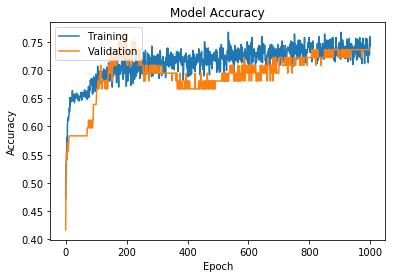

In [497]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

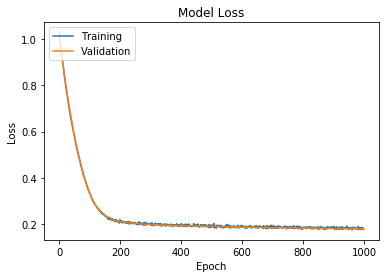

In [498]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [499]:
y_pred=model.predict_classes(x_test)
y_test= [int(i) for i in y_test]

In [500]:
y_pred=y_pred.reshape(180)

In [501]:
print("Confusion Matrix")
pd.DataFrame(confusion_matrix(y_test, y_pred),
                   index=['True:yes', 'True: no'],
                   columns=['Pred: yes', 'Pred: no'])

Confusion Matrix


,Pred: yes,Pred: no
True:yes,105,25
True: no,23,27


In [502]:
model.save('model2New.h5')